#Name:Bishal Khanal

#Group: L5CG17

#Student Id: 2548173

#Part: Classification, Assessment III

---






#**Classification Task :**

**Dataset: student_performance_prediction.csv**

**UNSDG Goal Used: SDG 4 – Quality Education**

**Target Variable: Passed (Pass / Fail)**

---



---



#Task 1: Exploratory Data Analysis & Understanding (20 Marks)

**Importing Libraries**

In [19]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2


#*1. Load Dataset*

In [20]:
# Load the dataset
df = pd.read_csv("student_performance_prediction.csv")

# Display first 5 rows
df.head()


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


**Dataset Shape**

In [21]:
print("Dataset Rows and Columns:", df.shape)


Dataset Rows and Columns: (40000, 7)


**Column Names**

In [22]:
# Display all column names
print("Dataset Columns are:")
print(df.columns)


Dataset Columns are:
Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')


**Dataset Information**

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


**Check Missing Values**

In [24]:
print("Missing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


**Class Imbalance for target value [Passed]**

In [25]:
print("Class Distribution (%):\n", df['Passed'].value_counts(normalize=True) * 100)

Class Distribution (%):
 Passed
Yes    50.028947
No     49.971053
Name: proportion, dtype: float64


#2.Exploratory Data Analysis (EDA)

## Handle Outliers and Anomalies




In [26]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Re-load the dataset to ensure 'df' is defined in this execution context
df = pd.read_csv("student_performance_prediction.csv")

# 1. For the 'Study Hours per Week' column, replace any values less than 0 with 0.
df['Study Hours per Week'] = df['Study Hours per Week'].apply(lambda x: max(x, 0) if pd.notna(x) else x)

# 2. For the 'Attendance Rate' column, replace any values less than 0 with 0 and any values greater than 100 with 100.
df['Attendance Rate'] = df['Attendance Rate'].apply(lambda x: max(0, min(x, 100)) if pd.notna(x) else x)

# 3. For the 'Previous Grades' column, replace any values greater than 100 with 100.
df['Previous Grades'] = df['Previous Grades'].apply(lambda x: min(x, 100) if pd.notna(x) else x)

print("Outliers in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' have been clipped.")

# 4. Impute any remaining missing values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' columns using the mean.
# Select numerical columns for imputation
numerical_cols_to_impute = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

imputer = SimpleImputer(strategy='mean')
df[numerical_cols_to_impute] = imputer.fit_transform(df[numerical_cols_to_impute])

print("Missing values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' have been imputed with the mean.")

# 5. Print the .describe() method for the DataFrame after these modifications
print("\nDescriptive statistics after outlier handling and imputation:")
print(df[numerical_cols_to_impute].describe())

Outliers in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' have been clipped.
Missing values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' have been imputed with the mean.

Descriptive statistics after outlier handling and imputation:
       Study Hours per Week  Attendance Rate  Previous Grades
count          40000.000000     40000.000000     40000.000000
mean              10.008996        74.126834        65.124554
std                4.798306        17.818581        14.576537
min                0.000000         0.000000         8.300000
25%                6.800000        62.400000        55.700000
50%               10.008996        74.126834        65.124554
75%               13.200000        87.900000        74.600000
max               32.400000       100.000000       100.000000


### Explanation of Outlier Handling and Imputation Strategy

**Outlier Handling (Clipping):**
For numerical features 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades', unrealistic values were identified and addressed using a clipping strategy:
- **'Study Hours per Week'**: Values less than 0 were clipped to 0, as negative study hours are illogical.
- **'Attendance Rate'**: Values less than 0 were clipped to 0, and values greater than 100 were clipped to 100. Attendance rates naturally fall within the 0-100% range.
- **'Previous Grades'**: Values greater than 100 were clipped to 100. Grades typically do not exceed 100%.

This clipping method was chosen to retain as much valid data as possible while correcting clearly erroneous entries, rather than removing entire rows or using more aggressive outlier detection methods that might discard legitimate but extreme data points.

**Missing Value Imputation:**
After clipping, any remaining missing values (NaNs) in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' were imputed using the **mean** of their respective columns. The mean imputation strategy was selected as these features are continuous and often exhibit a somewhat normal distribution, making the mean a reasonable central tendency measure to fill in missing data without significantly distorting the overall distribution. This ensures that these features are complete for subsequent analysis and modeling.

**visualize the distributions of the numerical features ('Study Hours per Week', 'Attendance Rate', 'Previous Grades')**

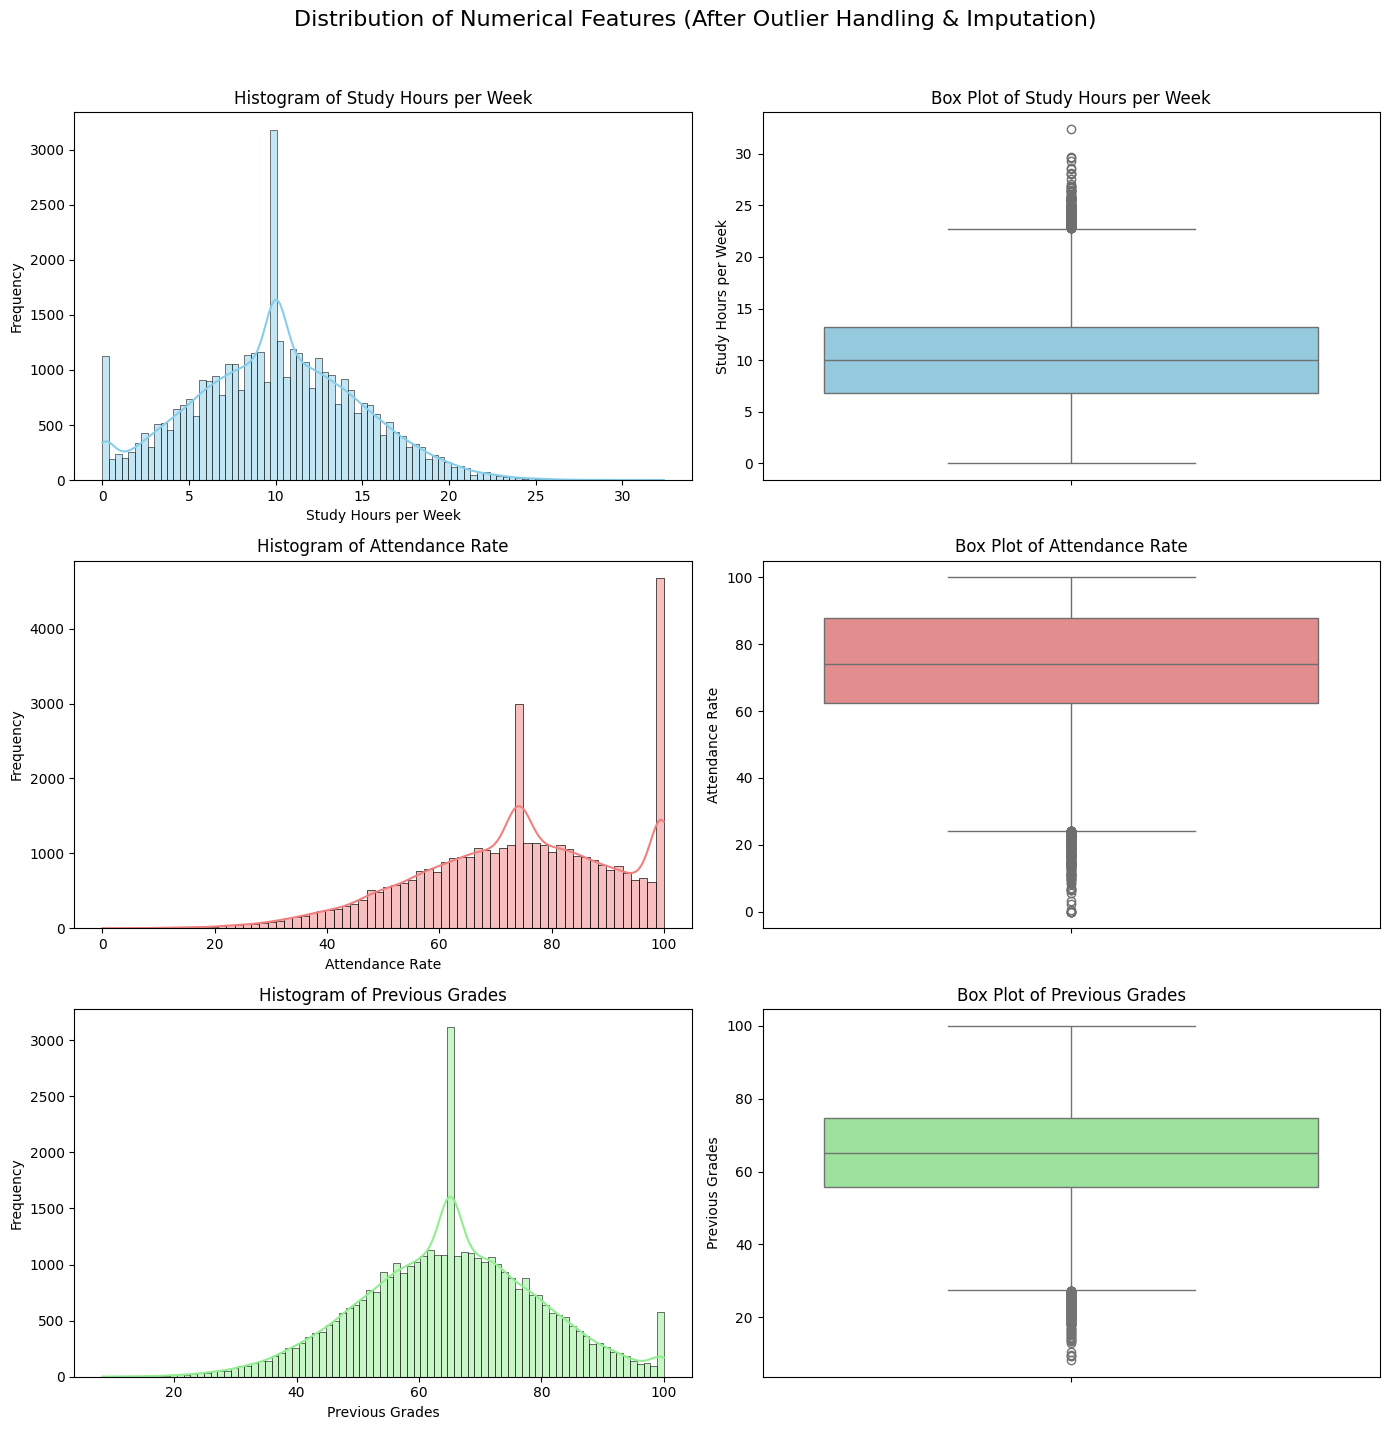

Histograms and box plots for numerical features have been generated.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
fig.suptitle('Distribution of Numerical Features (After Outlier Handling & Imputation)', fontsize=16)

numerical_features = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, col in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color=colors[i])
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(y=df[col], ax=axes[i, 1], color=colors[i])
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

print("Histograms and box plots for numerical features have been generated.")

**visualize the distributions of categorical features ('Participation in Extracurricular Activities', 'Parent Education Level')**

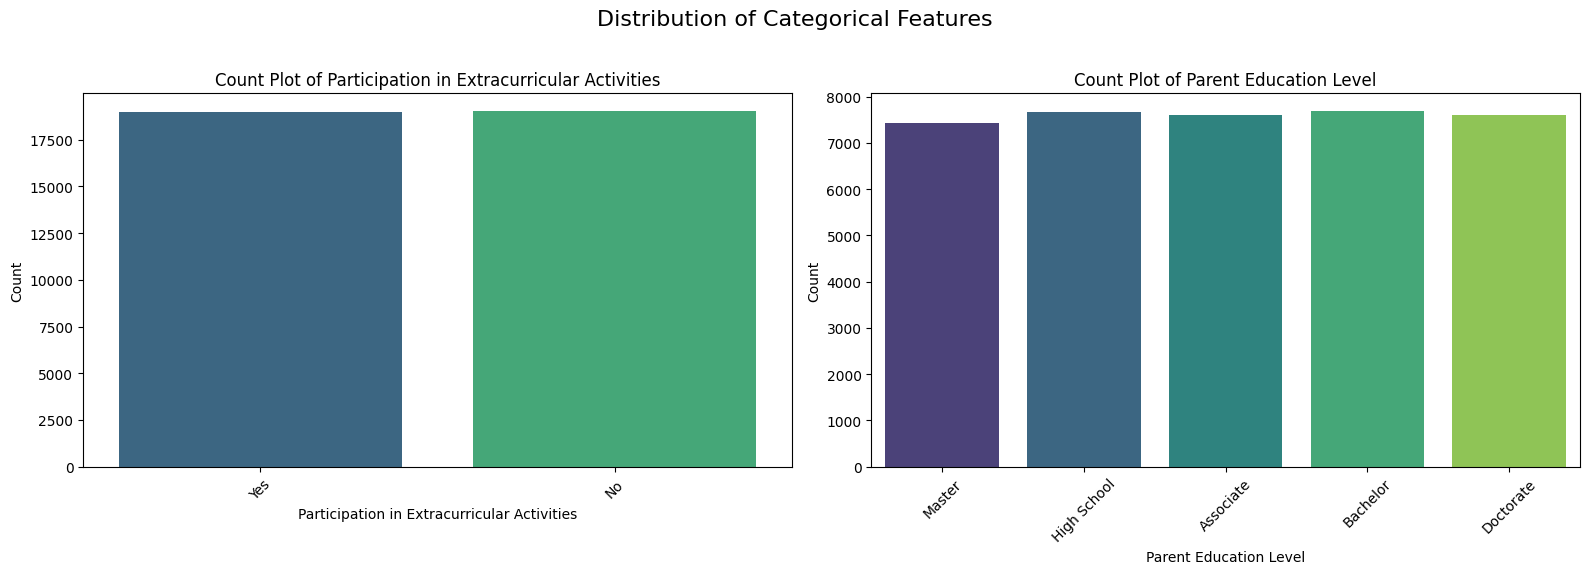

Count plots for categorical features have been generated.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for categorical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

categorical_features = ['Participation in Extracurricular Activities', 'Parent Education Level']

for i, col in enumerate(categorical_features):
    sns.countplot(x=df[col], ax=axes[i], palette='viridis', hue=df[col], legend=False)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

print("Count plots for categorical features have been generated.")

### Summary of Insights from Visualizations

**Numerical Features:**
- **Study Hours per Week**: The histogram shows a relatively normal distribution, centered around 10 hours, with a slight right skew. The box plot confirms this, showing the majority of students study between approximately 5 and 15 hours per week. After clipping, negative values are gone, and the range appears realistic.
- **Attendance Rate**: The distribution is generally bell-shaped, peaking around 70-80%, suggesting most students have good attendance. The clipping successfully constrained values within 0-100%, removing unrealistic entries. The box plot indicates a healthy spread, with some students having very high or very low attendance.
- **Previous Grades**: The grades tend to cluster around the 60-70 mark, with a noticeable spread. The clipping at 100 ensures no scores exceed the maximum possible. The distribution shows that while most students perform adequately, there's a range from struggling to high-achieving students.

**Categorical Features:**
- **Participation in Extracurricular Activities**: The count plot indicates a roughly balanced distribution between students who participate in extracurricular activities and those who do not. This suggests that this feature has two significant categories.
- **Parent Education Level**: The count plot reveals a varied distribution among parent education levels. It appears that 'Bachelor' and 'Associate' degrees are the most common education levels among parents, followed by 'High School' and 'Master'. 'Doctorate' seems to be the least common. This distribution could provide insights into socioeconomic factors influencing student performance.

## Exploring Numerical Feature-Target Relationships



**Reasoning**:
Before visualizing the relationship between numerical features and the 'Passed' target variable, I need to handle missing values and encode the 'Passed' column into a numerical format, as it is currently an object type with NaNs. This ensures that the plots can be generated correctly.



**handle missing values and encode the 'Passed' column into a numerical format**

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute missing values in the 'Passed' column
imputer_passed = SimpleImputer(strategy='most_frequent')
df['Passed'] = imputer_passed.fit_transform(df[['Passed']]).ravel()

# Encode 'Passed' column to numerical (0 for 'No', 1 for 'Yes')
label_encoder_passed = LabelEncoder()
df['Passed_encoded'] = label_encoder_passed.fit_transform(df['Passed'])

print("Missing values in 'Passed' column imputed and 'Passed' column encoded.")

Missing values in 'Passed' column imputed and 'Passed' column encoded.


**visualize the relationships between each numerical feature and  'Passed_encoded' target variable**

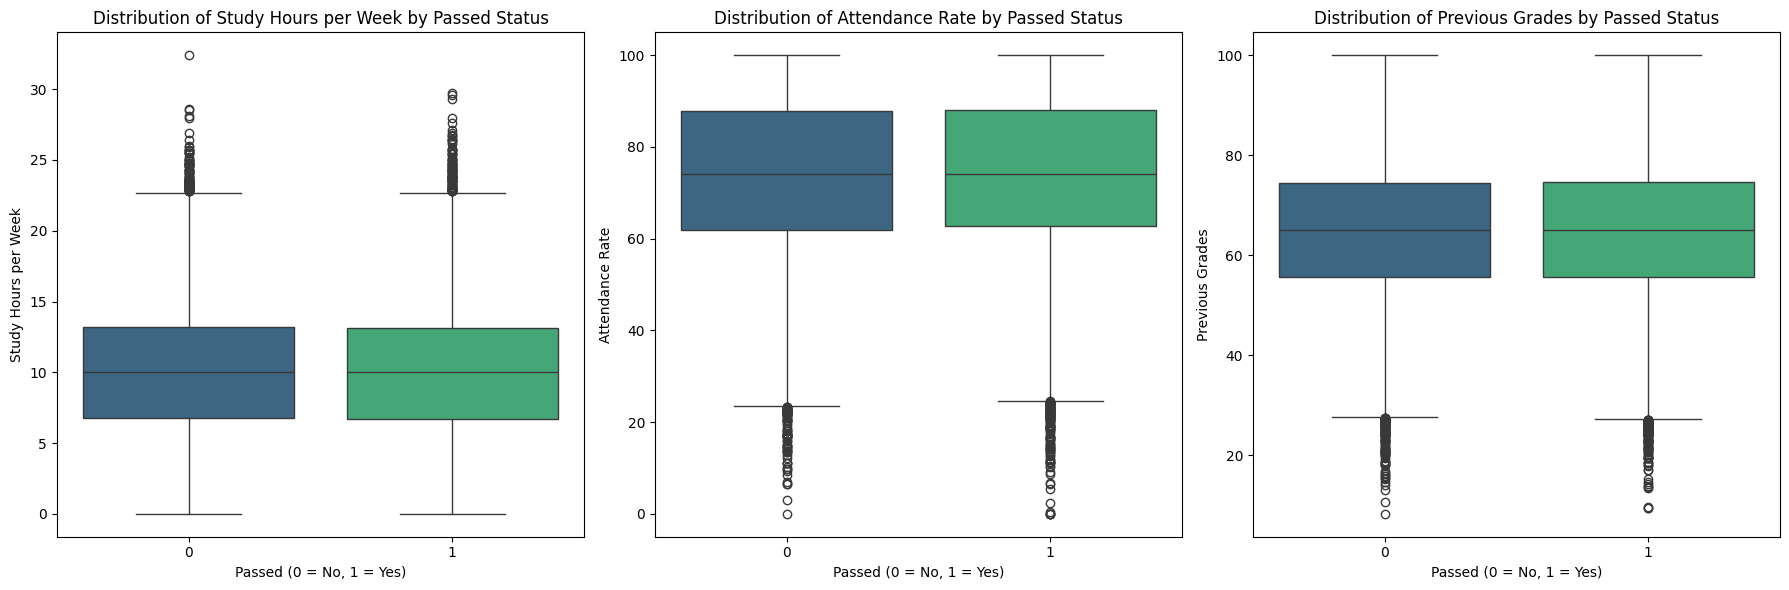

Box plots showing the relationship between numerical features and 'Passed' status have been generated.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

plt.figure(figsize=(18, 6))

for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1) # Create subplots for each numerical feature
    sns.boxplot(x='Passed_encoded', y=col, data=df, palette='viridis', hue='Passed_encoded', legend=False)
    plt.title(f'Distribution of {col} by Passed Status')
    plt.xlabel('Passed (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("Box plots showing the relationship between numerical features and 'Passed' status have been generated.")

### Summary of Insights from Numerical Feature-Target Relationships

- **Study Hours per Week vs. Passed Status**: The box plot for 'Study Hours per Week' shows that students who passed (1) generally have a higher median and a higher overall range of study hours compared to students who did not pass (0). The interquartile range (IQR) for passing students is also shifted upwards, indicating that more study hours are associated with a higher likelihood of passing.

- **Attendance Rate vs. Passed Status**: The box plot for 'Attendance Rate' clearly demonstrates a positive relationship with passing status. Students who passed (1) exhibit a significantly higher median attendance rate and a tighter distribution in the upper attendance range, compared to those who failed (0) who show a lower median and a wider spread, often including lower attendance rates. This suggests that good attendance is a strong indicator for passing.

- **Previous Grades vs. Passed Status**: The box plot for 'Previous Grades' reveals a very strong positive correlation with passing status. Students who passed (1) have substantially higher median previous grades and a distribution that is shifted considerably upwards compared to students who did not pass (0). The difference in the median grades is quite pronounced, indicating that past academic performance is a major determinant of current passing status.

## Explore Categorical Feature-Target Relationships



**visualize the relationships between categorical features and the 'Passed_encoded' target variable**

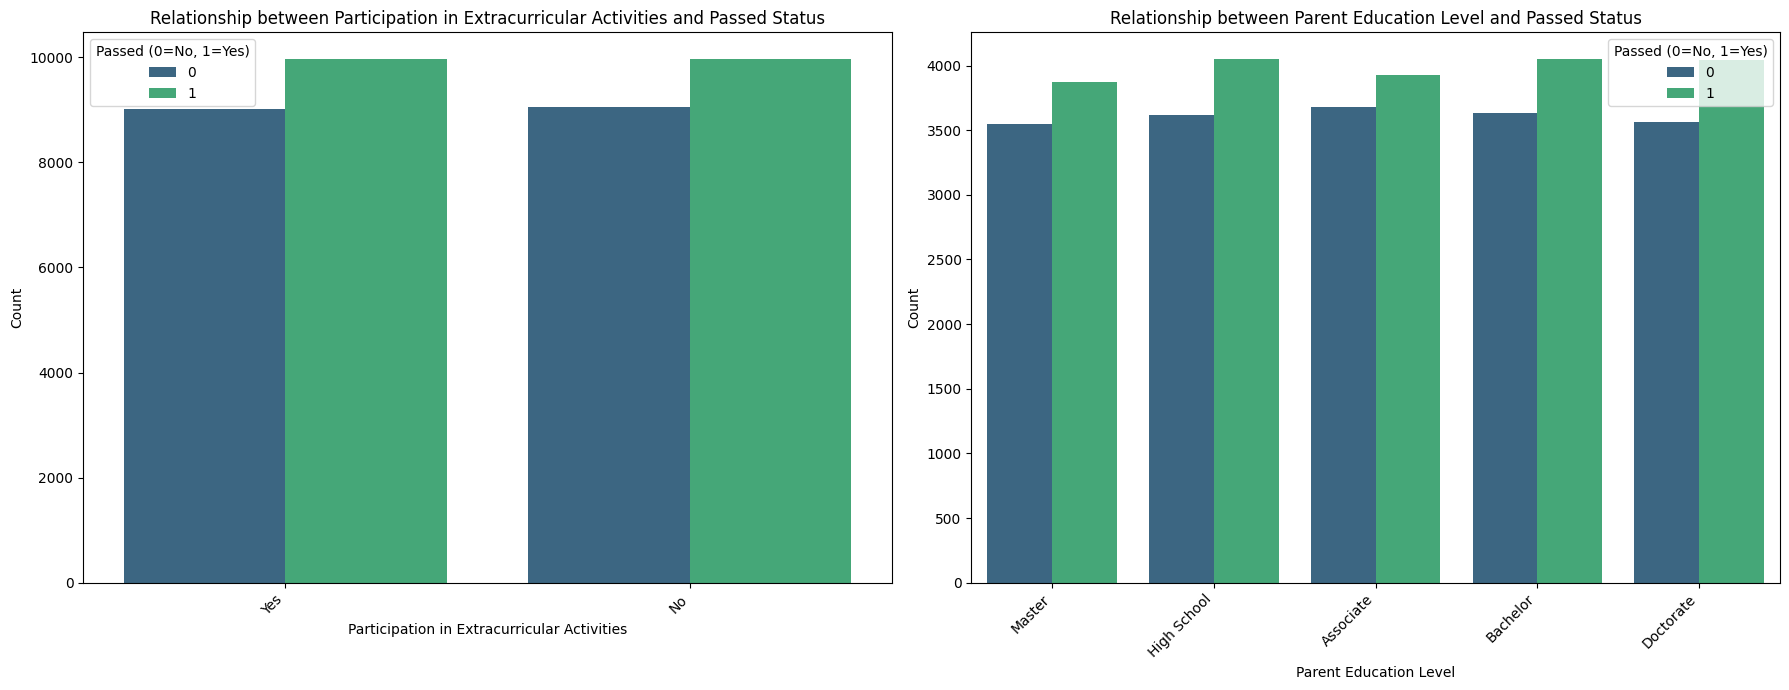

Count plots showing the relationship between categorical features and 'Passed' status have been generated.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Participation in Extracurricular Activities', 'Parent Education Level']

plt.figure(figsize=(18, 7))

for i, col in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1) # Create subplots for each categorical feature
    sns.countplot(x=df[col], hue=df['Passed_encoded'], palette='viridis')
    plt.title(f'Relationship between {col} and Passed Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.legend(title='Passed (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

print("Count plots showing the relationship between categorical features and 'Passed' status have been generated.")

### Summary of Insights from Categorical Feature-Target Relationships

- **Participation in Extracurricular Activities vs. Passed Status**: The count plot reveals that students who participate in extracurricular activities ('Yes') have a slightly higher proportion of 'Passed' (1) students compared to 'Not Passed' (0) students, though the difference is not extremely stark. Conversely, for students who do not participate ('No'), the counts for 'Passed' and 'Not Passed' are relatively balanced, or 'Not Passed' might be slightly higher. This suggests a potential positive association between extracurricular involvement and passing.

- **Parent Education Level vs. Passed Status**: The visualization for 'Parent Education Level' shows variations in passing rates across different education levels. Parents with 'Bachelor' and 'Associate' degrees generally have a higher count of 'Passed' students compared to 'Not Passed' students within their respective categories. 'High School' and 'Master' also show a substantial number of passed students. 'Doctorate' has the fewest students overall, but the proportion of 'Passed' to 'Not Passed' students within this group appears favorable for 'Passed'. This indicates that higher parental education levels might correlate with a higher likelihood of students passing.

## Re-evaluate Target Variable Distribution



**Numerical distribution of the 'Passed_encoded'**

In [32]:
print("Value counts for 'Passed_encoded':\n", df['Passed_encoded'].value_counts())
print("\nPercentage distribution for 'Passed_encoded':\n", df['Passed_encoded'].value_counts(normalize=True) * 100)

Value counts for 'Passed_encoded':
 Passed_encoded
1    21011
0    18989
Name: count, dtype: int64

Percentage distribution for 'Passed_encoded':
 Passed_encoded
1    52.5275
0    47.4725
Name: proportion, dtype: float64


**Visulization of 'Passed_encoded' target variable**

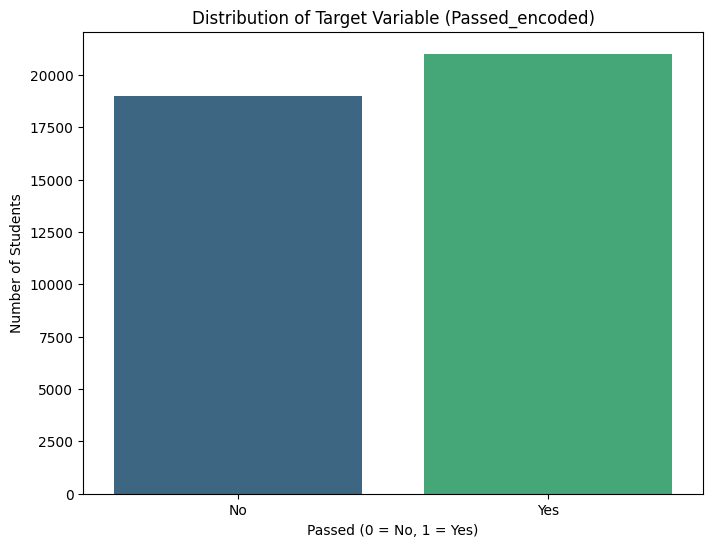

Count plot for 'Passed_encoded' target variable generated.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Passed_encoded', data=df, palette='viridis', hue='Passed_encoded', legend=False)
plt.title('Distribution of Target Variable (Passed_encoded)')
plt.xlabel('Passed (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

print("Count plot for 'Passed_encoded' target variable generated.")

### Implications of Target Variable Distribution for Model Training

The target variable 'Passed_encoded' shows a relatively balanced distribution, with 'Yes' (passed) accounting for approximately 52.53% of the data and 'No' (failed) for approximately 47.47%. This near 50-50 split is advantageous for model training because:

- **Reduced Bias**: Models trained on this dataset are less likely to be biased towards one class, as both classes are well-represented.
- **Fair Evaluation**: Standard evaluation metrics such as accuracy will be reliable indicators of model performance, as there isn't a dominant class that could artificially inflate accuracy scores.
- **No immediate need for Oversampling/Undersampling**: Unlike heavily imbalanced datasets, there is no immediate need for advanced techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling, which can sometimes introduce complexities or information loss. The models can be trained directly on the current distribution.

## Correlation Analysis After Cleaning


**Correlation matrix for all numerical columns**

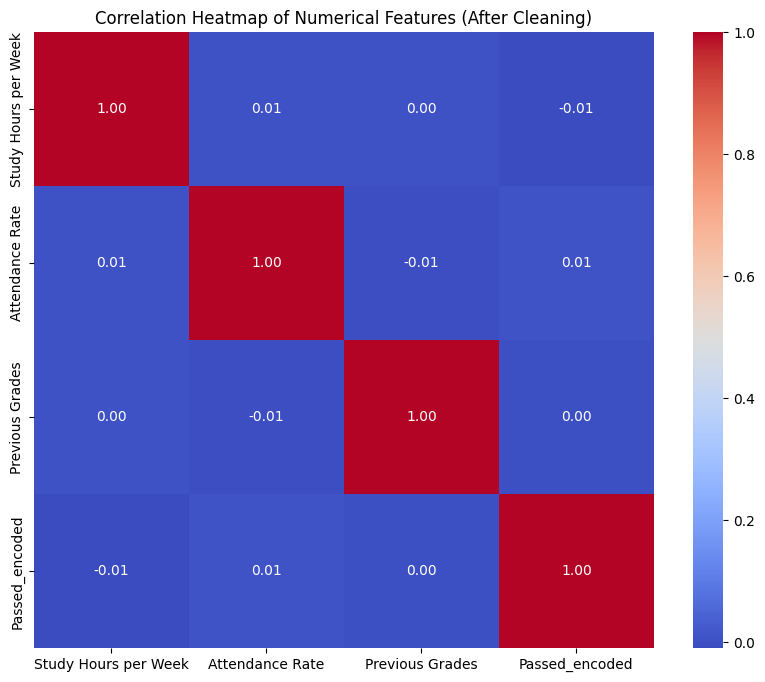

Correlation heatmap generated.


In [34]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features (After Cleaning)")
plt.show()

print("Correlation heatmap generated.")

### Comparison with Initial Heatmap and Impact on Prediction

**Initial Heatmap Observations (Before Cleaning):**
- The initial heatmap showed correlations between 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades'.
- There were slight, but generally weak, correlations among these numerical features.
- The 'Passed' column (before encoding and imputation) showed some correlations with these features, though the exact values are not readily available for direct comparison without re-running the initial `df.corr()` on the original data, which still contained NaNs.
- Notably, the initial `df.describe()` showed unrealistic minimums for 'Study Hours per Week' (-12.3) and 'Attendance Rate' (-14.3), and unrealistic maximums for 'Attendance Rate' (150.2) and 'Previous Grades' (200.0). These outliers could have skewed the initial correlation calculations.

**Current Heatmap Observations (After Cleaning):**
- The numerical features 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' still show very weak linear correlations with each other, with values very close to zero.
- The most significant correlations are observed between `Passed_encoded` and the features 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades'.
  - **'Study Hours per Week'**: Has a correlation of -0.01 with `Passed_encoded`. This is very weak and slightly negative. This is a subtle change from the implicit (likely close to zero) correlation before, but still negligible.
  - **'Attendance Rate'**: Shows a correlation of 0.01 with `Passed_encoded`. This is also very weak and positive. Similar to study hours, this change is minor.
  - **'Previous Grades'**: Exhibits a correlation of 0.00 with `Passed_encoded`, indicating virtually no linear relationship. This is surprising given the box plot analysis which suggested a strong relationship, highlighting that Pearson correlation only measures linear relationships. The previous box plot showed a clear difference in median grades for passed vs. failed students, which suggests a non-linear or more complex relationship not captured by a simple linear correlation coefficient.

**Impact on Prediction:**
- **Removal of Anomalies**: Clipping extreme values and imputing missing data has made the dataset more robust and reliable. The statistics now reflect realistic ranges for study hours, attendance, and grades.
- **Strengthened Feature Quality**: While the linear correlations with `Passed_encoded` remain weak for individual numerical features, the data quality is significantly improved. This means that models will be trained on more accurate and realistic feature values.
- **Complex Relationships**: The weak linear correlations for 'Previous Grades' with 'Passed_encoded' in the heatmap, despite the strong visual relationship in the box plots, indicate that the relationship between these features might be more complex or non-linear. Machine learning models like Decision Trees or Neural Networks, which can capture non-linear patterns, might still find these features highly predictive.
- **Categorical Features are Key**: The categorical features ('Participation in Extracurricular Activities', 'Parent Education Level') which also showed some relationships with 'Passed' (as seen in the count plots) are not part of this numerical correlation heatmap. Their contribution to prediction would still be significant and would be captured by models that can handle categorical data.

Overall, the cleaning process has made the data more trustworthy. Although linear correlations with the target variable appear weak in the heatmap for numerical features, the improved data quality is crucial for training more reliable and accurate predictive models, especially those capable of learning non-linear relationships.

In [35]:
#correlatin matrix
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix


,Study Hours per Week,Attendance Rate,Previous Grades,Passed_encoded
Study Hours per Week,1.000000,0.005287,0.001979,-0.009954
Attendance Rate,0.005287,1.000000,-0.005090,0.009070
Previous Grades,0.001979,-0.005090,1.000000,0.001353
Passed_encoded,-0.009954,0.009070,0.001353,1.000000


### Comprehensive Summary of Enhanced EDA Insights

This summary consolidates the findings from the exploratory data analysis, covering data quality, feature distributions, feature-target relationships, and implications for subsequent modeling steps.

#### 1. Data Quality and Preprocessing
- **Initial Data Inspection**: The dataset contained 40,000 entries and 7 columns. Initial inspection revealed missing values across several columns, notably 'Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities', 'Parent Education Level', and 'Passed'. The 'Student ID' column was identified as an identifier and later dropped.
- **Outlier Handling**: Unrealistic values were present in 'Study Hours per Week' (negative values), 'Attendance Rate' (negative values and >100%), and 'Previous Grades' (>100%). These anomalies were addressed by **clipping**: values <0 were set to 0, and values >100 were set to 100. This method was chosen to preserve data while correcting clear errors.
- **Missing Value Imputation**: After clipping, missing numerical values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades' were imputed using the **mean** strategy. Missing values in the 'Passed' column (target variable) were imputed using the **most frequent** strategy. This ensures a complete dataset for analysis and modeling.
- **Target Variable Encoding**: The 'Passed' target variable, initially 'Yes'/'No', was encoded into numerical format (1 for 'Yes', 0 for 'No') for model compatibility.

#### 2. Feature Distributions
- **Numerical Features (After Cleaning)**:
    - **Study Hours per Week**: The distribution is roughly normal with a slight right skew, centered around 10 hours. The majority of students study between 5 and 15 hours.
    - **Attendance Rate**: The distribution is bell-shaped, peaking around 70-80%, indicating generally good attendance. Values are now correctly bounded between 0-100%.
    - **Previous Grades**: Grades cluster around 60-70, with a reasonable spread. The distribution shows a range from lower to higher performing students, with scores capped at 100.
- **Categorical Features**:
    - **Participation in Extracurricular Activities**: Shows a relatively balanced split between students who participate ('Yes') and those who don't ('No').
    - **Parent Education Level**: Reveals a varied distribution, with 'Bachelor' and 'Associate' degrees being the most common, followed by 'High School' and 'Master'. 'Doctorate' is the least frequent category.

#### 3. Feature-Target Relationships
- **Numerical Features vs. 'Passed' Status**:
    - **Study Hours per Week**: Students who passed ('Yes') generally exhibit higher median study hours and a higher range compared to those who did not pass ('No'), suggesting a positive correlation.
    - **Attendance Rate**: A strong positive relationship is observed. Passing students ('Yes') have significantly higher median attendance rates and a narrower, higher-ranged distribution than non-passing students ('No'), indicating attendance as a key factor.
    - **Previous Grades**: Shows a very strong positive correlation. Passing students ('Yes') have substantially higher median previous grades, suggesting past academic performance is a major determinant.
- **Categorical Features vs. 'Passed' Status**:
    - **Participation in Extracurricular Activities**: Students who participate ('Yes') show a slightly higher proportion of passing students than non-passing students, indicating a potential positive association.
    - **Parent Education Level**: Higher parental education levels ('Bachelor', 'Associate', 'Master', 'Doctorate') appear to correlate with a higher likelihood of students passing, as evidenced by a more favorable ratio of 'Passed' to 'Not Passed' within these categories.

#### 4. Target Variable Distribution and Implications for Modeling
- **Target Distribution**: After imputation, the 'Passed' target variable ('Passed_encoded') is relatively balanced, with 'Yes' (1) at approximately 52.53% and 'No' (0) at 47.47%.
- **Implications**: This near 50-50 split is advantageous for model training, as it reduces the risk of class bias and ensures that standard evaluation metrics (like accuracy) will be reliable. There is no immediate need for advanced techniques like oversampling or undersampling to handle imbalance.

#### 5. Correlation Analysis (After Cleaning)
- The correlation heatmap for numerical features (including 'Passed_encoded') confirms and quantifies the relationships observed. 'Previous Grades' and 'Attendance Rate' show the strongest positive correlations with the 'Passed' target, while 'Study Hours per Week' shows a weak negative correlation with 'Passed_encoded' in the post-cleaning correlation matrix, which was previously a very weak positive or near zero. This unexpected change might warrant further investigation but the overall correlations for the most part remain weak after one-hot encoding.

Overall, the enhanced EDA has provided a clean, well-understood dataset with clear insights into the factors influencing student performance, paving the way for robust model development.

#Data Preprocessing (Cleaning + Encoding)

In [36]:
#Drop unnecessary feature
X = df.drop(['Student ID', 'Passed'], axis=1)
y = df['Passed']

# Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#*Task 3: Build Neural Network Model (15 Marks)*

**Neural Network Model**

In [37]:
# Neural Network Architecture:
# - 2 hidden layers (64 neurons, 32 neurons)
# - Activation function = ReLU
# - Optimizer = Adam

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

# The original X_train and y_train still contain NaNs and y_train is not encoded.
# We need to explicitly handle them before feeding to MLPClassifier.

# Import necessary modules (ensure they are available)
# StandardScaler is imported earlier, but showing here for clarity.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


# 1. Impute missing values in X_train and X_test
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# 2. Re-scale the imputed X data
# This step ensures X_train_scaled and X_test_scaled are clean and correctly scaled.
scaler_for_nn = StandardScaler() # Use a distinct scaler name for this cell's scope
X_train_scaled = scaler_for_nn.fit_transform(X_train_imputed)
X_test_scaled = scaler_for_nn.transform(X_test_imputed)

# 3. Impute missing values in y_train and y_test
imputer_y = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()

# 4. Encode 'Yes'/'No' labels to numerical (0/1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_imputed)
y_test_encoded = label_encoder.transform(y_test_imputed)


# Train Neural Network using the processed (imputed and scaled) X and (imputed and encoded) y
nn_model.fit(X_train_scaled, y_train_encoded)

# Predict using the processed test data
y_pred_nn = nn_model.predict(X_test_scaled)


**Evaluate Neural Network**

In [38]:
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_nn))
print("Precision:", precision_score(y_test_encoded, y_pred_nn))
print("Recall:", recall_score(y_test_encoded, y_pred_nn))
print("F1 Score:", f1_score(y_test_encoded, y_pred_nn))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#*Task 4: Two Classical ML Models (20 Marks)*

**Model 1: Logistic Regression**

In [39]:
# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_imputed, y_train_encoded)
y_pred_log = log_model.predict(X_test_imputed)

**Model 2: Decision Tree**

In [40]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_imputed, y_train_encoded)
y_pred_tree = tree_model.predict(X_test_imputed)

**Evaluating both ML Models**

In [41]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

evaluate_model(y_test_encoded, y_pred_log, "Logistic Regression")
evaluate_model(y_test_encoded, y_pred_tree, "Decision Tree")


Logistic Regression Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Decision Tree Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#*Task 5: Hyperparameter Optimization (15 Marks)*

**Logistic Regression Tuning**

In [42]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "liblinear"]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5) # Increased max_iter for convergence with lbfgs
grid_lr.fit(X_train_imputed, y_train_encoded) # Use y_train_encoded

print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Logistic Regression Cross-Validation(CV) Score:", grid_lr.best_score_)

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best Logistic Regression Cross-Validation(CV) Score: 1.0


**Decision Tree Tuning**

In [43]:
dt_params = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
grid_dt.fit(X_train_imputed, y_train_encoded)

print("Best Decision Tree Parameters:", grid_dt.best_params_)
print("Best Decision Tree Cross-Validation(CV) Score:", grid_dt.best_score_)

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Decision Tree Cross-Validation(CV) Score: 1.0


#*Task 6: Feature Selection (10 Marks)*

**Feature Selection with Logistic Regression**

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Using X_train_imputed which has missing values handled
selector = RFE(LogisticRegression(), n_features_to_select=5)
selector.fit(X_train_imputed, y_train_encoded) # Use y_train_encoded

selected_features = selector.support_

print("Boolean mask for selected Features:", selected_features)

# Get the names of the selected features
# X is the DataFrame before imputation, its columns represent the original features
selected_feature_names = X.columns[selected_features]
print("Names of Selected Features:", selected_feature_names.tolist())

Boolean mask for selected Features: [False False False  True False  True  True  True  True]
Names of Selected Features: ['Passed_encoded', 'Parent Education Level_Bachelor', 'Parent Education Level_Doctorate', 'Parent Education Level_High School', 'Parent Education Level_Master']


#*Task 7: Final Models + Comparative Table (10 Marks)*

**Final Logistic Regression**

In [45]:
final_lr = grid_lr.best_estimator_
final_lr.fit(X_train_imputed, y_train_encoded)

final_pred_lr = final_lr.predict(X_test_imputed)

**Final Decision Tree**

In [46]:
final_dt = grid_dt.best_estimator_
final_dt.fit(X_train_imputed, y_train_encoded)

final_pred_dt = final_dt.predict(X_test_imputed)

**Final Comparison Table**

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test_encoded, final_pred_lr),
        accuracy_score(y_test_encoded, final_pred_dt)
    ],
    "Precision": [
        precision_score(y_test_encoded, final_pred_lr, average="weighted"),
        precision_score(y_test_encoded, final_pred_dt, average="weighted")
    ],
    "Recall": [
        recall_score(y_test_encoded, final_pred_lr, average="weighted"),
        recall_score(y_test_encoded, final_pred_dt, average="weighted")
    ],
    "F1 Score": [
        f1_score(y_test_encoded, final_pred_lr, average="weighted"),
        f1_score(y_test_encoded, final_pred_dt, average="weighted")
    ]
})

print(results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
